In [11]:
import pandas as pd 
import tensorflow as tf 
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()


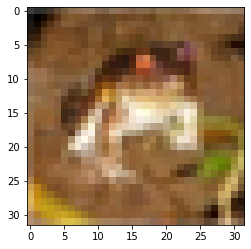

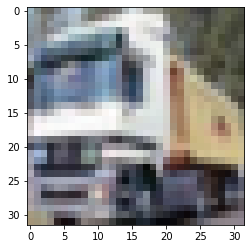

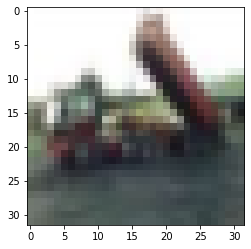

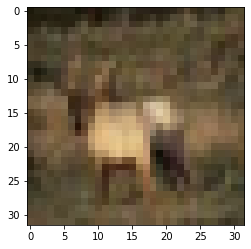

In [12]:
import matplotlib.pyplot as plt 
for i in range(0,4):
    plt.imshow(X_train[i])
    plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))
# scal = StandardScaler()
# X_train = scal.fit_transform(X_train)
# X_test = scal.fit_transform(X_test)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 10)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes = 10)

In [14]:
# we fix the random state
tf.random.set_seed(1234)

# Definition of our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# optimizer definition
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


In [15]:
# training
history = model.fit(X_train, Y_train,validation_split=0.1, epochs=10, verbose=True)

Epoch 1/10
1407/1407 [==============================] - 23s 15ms/step - loss: 5.3824 - accuracy: 0.0966 - val_loss: 2.3047 - val_accuracy: 0.0950
Epoch 2/10
1407/1407 [==============================] - 20s 14ms/step - loss: 2.3032 - accuracy: 0.0985 - val_loss: 2.3046 - val_accuracy: 0.0976
Epoch 3/10
1407/1407 [==============================] - 20s 14ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3043 - val_accuracy: 0.1058
Epoch 4/10
1407/1407 [==============================] - 20s 14ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3044 - val_accuracy: 0.0976
Epoch 5/10
1407/1407 [==============================] - 19s 14ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3046 - val_accuracy: 0.0970
Epoch 6/10
1407/1407 [==============================] - 19s 14ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3046 - val_accuracy: 0.1036
Epoch 7/10
1407/1407 [==============================] - 20s 14ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3046 -

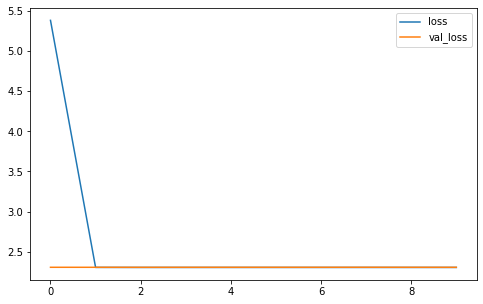

In [16]:
import matplotlib.pyplot as plt
# plot loss vs val_loss to avoid overfitting
pd.DataFrame(history.history).drop(["accuracy", "val_accuracy"], axis=1).plot(figsize=(8,5))
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
print('results:')
print('accuracy: {:2.5}'.format(accuracy_score(model.predict(X_test).argmax(axis=1), Y_test.argmax(axis=1))))

results:
accuracy: 0.1


La prédiction que l'on obtient reste très mauvaise, seulement 10 % du dataset de test est bien prédit

<AxesSubplot:>

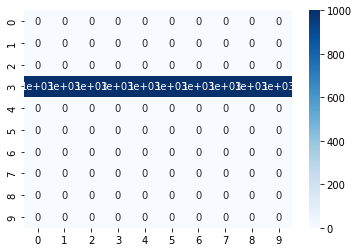

In [18]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
# test results
sns.heatmap(confusion_matrix(model.predict(X_test).argmax(axis=1), Y_test.argmax(axis=1)), annot=True, cmap="Blues")

3. Construire le perceptron multicouche suivant : </br>
a. Première couche cachée de 512 neurones densément connectés à la couche </br>
d'entrée, fonction d'activation relu, dropout de 0,2 et normalisation par lots.

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# optimizer definition
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [20]:
# training
history = model.fit(X_train, Y_train,validation_split=0.1, epochs=10, verbose=True)

Epoch 1/10
 663/1407 [=============>................] - ETA: 53s - loss: 2.2259 - accuracy: 0.2516